In [1]:
#Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [2]:
#Read CSV
elections = pd.read_csv("../data/processed/elections.csv")

In [3]:
#Select relevant columns from the 'elections' DataFrame for training
train = elections[['Total_Receipt', 'Receipts_Sum', 'Receipts_Prop', 'Won Primary']]

#Initialize a LabelEncoder to convert categorical labels into numeric format
label_encoder = LabelEncoder()

#Fit the LabelEncoder on the 'Won Primary' column and transform it to numeric values
train['Won Primary'] = label_encoder.fit_transform(train['Won Primary'])

#Define feature matrix (X) and target vector (y)
X = train[['Total_Receipt', 'Receipts_Sum', 'Receipts_Prop']]
y = train['Won Primary']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/9p/g4b_94bd7fggx8kn5fnnsdc00000gn/T/ipykernel_68413/330355431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Won Primary'] = label_encoder.fit_transform(train['Won Primary'])


In [4]:
#Initialize and train Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

#Create predictions
y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

#Calculate residuals
residuals_rf = y_pred_rf - y_test

#Calculate squared residuals
squared_residuals_rf = residuals_rf ** 2

#Calculate mean of squared residuals
mean_squared_residuals_rf = np.mean(squared_residuals_rf)

#Calculate RMSE
rmse_rf = np.sqrt(mean_squared_residuals_rf)

print("RMSE:", rmse_rf)

RMSE: 0.385275875185561


Accuracy: 0.85
Precision: 0.79
Recall: 0.80
ROC AUC: 0.88


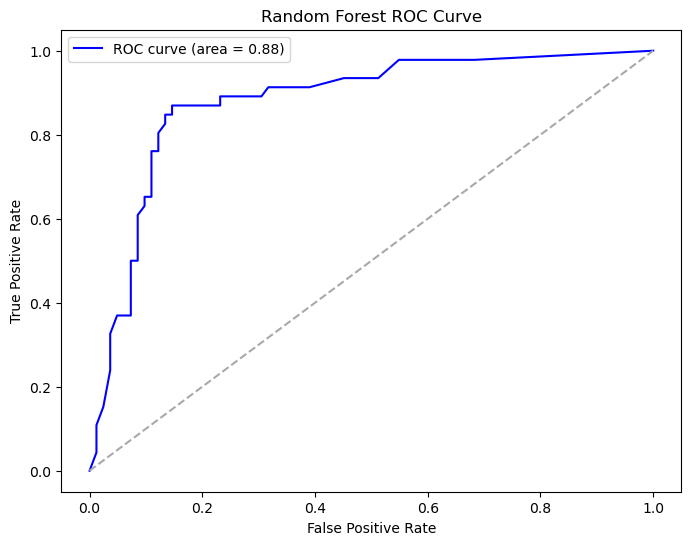

In [5]:
#Calculate model evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)

#Print model evaluation metrics
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'ROC AUC: {rf_roc_auc:.2f}')

#Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

In [6]:
def calculate_specificity_sensitivity(y_true, y_pred):
    """Function that given true and predicted values returns specificity and sensitivity"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    return specificity, sensitivity

# Calculate specificity and sensitivity
specificity_rf, sensitivity_rf = calculate_specificity_sensitivity(y_test, y_pred_rf)

print("Random Forest Specificity:", specificity_rf)
print("Random Forest Sensitivity:", sensitivity_rf)

Random Forest Specificity: 0.8780487804878049
Random Forest Sensitivity: 0.8043478260869565
